# Clasificación
Este notebook contiene un ejemplo básico de cómo usar los clasificadores KNN y Naive Bayes mediante scikit-learn

In [2]:
# Importaremos la mayoria de modulos que se utilizaran a lo largo de la práctica

# Modulos basicos
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Modulos de scikit-learn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,  accuracy_score
from sklearn.model_selection import train_test_split


In [3]:
# Funcion para calcular y visualizar la matriz de confusion
def plotCM(ytrue, ypred, clases=None, normalize = False, ax = None):
    """ Funcion para calcular y visualizar la matriz de confusion"""

    if clases == None:
        clases = list(set(ytrue))
        clases.sort() # etiquetas unicas ordenadas alfabeticamente

    CM = confusion_matrix(ytrue,ypred, labels=clases)

    #Normaliza la matriz de confusion dividiendo cada fila por el total de verdaderos
    if normalize:
        CM = 100*CM / CM.sum(axis=1).reshape(-1,1) #Aprovechando el Broadcasting!

    df = pd.DataFrame(CM, index=clases, columns=clases)
    df.index.name = 'True'; df.columns.name = 'Predicted'

    sns.heatmap( df, # Visualizando la matriz de confusion
             annot=True, fmt='2.1f', cmap='ocean_r',cbar=False,square=True, annot_kws={'fontsize':16}, ax=ax )

    plt.show()

## Ejemplo con el IRIS dataset

El dataset [Iris](https://en.wikipedia.org/wiki/Iris_flower_data_set) es uno de los conjuntos más usados (sino el más) para estudiar aprendizaje estadístico o machine learning. El conjunto de datos contiene 50 muestras de cada una de tres especies de Iris (Iris setosa, Iris virginica e Iris versicolor). Se midieron cuatro rasgos de cada muestra: el largo y el ancho del sépalos y pétalos, en centímetros.

<img src="https://miro.medium.com/v2/resize:fit:875/1*H2UmG5L1I5bzFCW006N5Ag.png" alt="Drawing" style="width: 600px;"/>


Carguemos el dataset de Iris desde seaborn (se puede descargar de muchos lugares):

Definiendo $X$ e $y$

In [14]:
iris = sns.load_dataset("iris")
iris.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species
114,5.8,2.8,5.1,2.4,virginica
10,5.4,3.7,1.5,0.2,setosa
60,5.0,2.0,3.5,1.0,versicolor
119,6.0,2.2,5.0,1.5,virginica
77,6.7,3.0,5.0,1.7,versicolor
59,5.2,2.7,3.9,1.4,versicolor
24,4.8,3.4,1.9,0.2,setosa
41,4.5,2.3,1.3,0.3,setosa
18,5.7,3.8,1.7,0.3,setosa
79,5.7,2.6,3.5,1.0,versicolor


In [5]:
X = iris.to_numpy()[:,0:4]


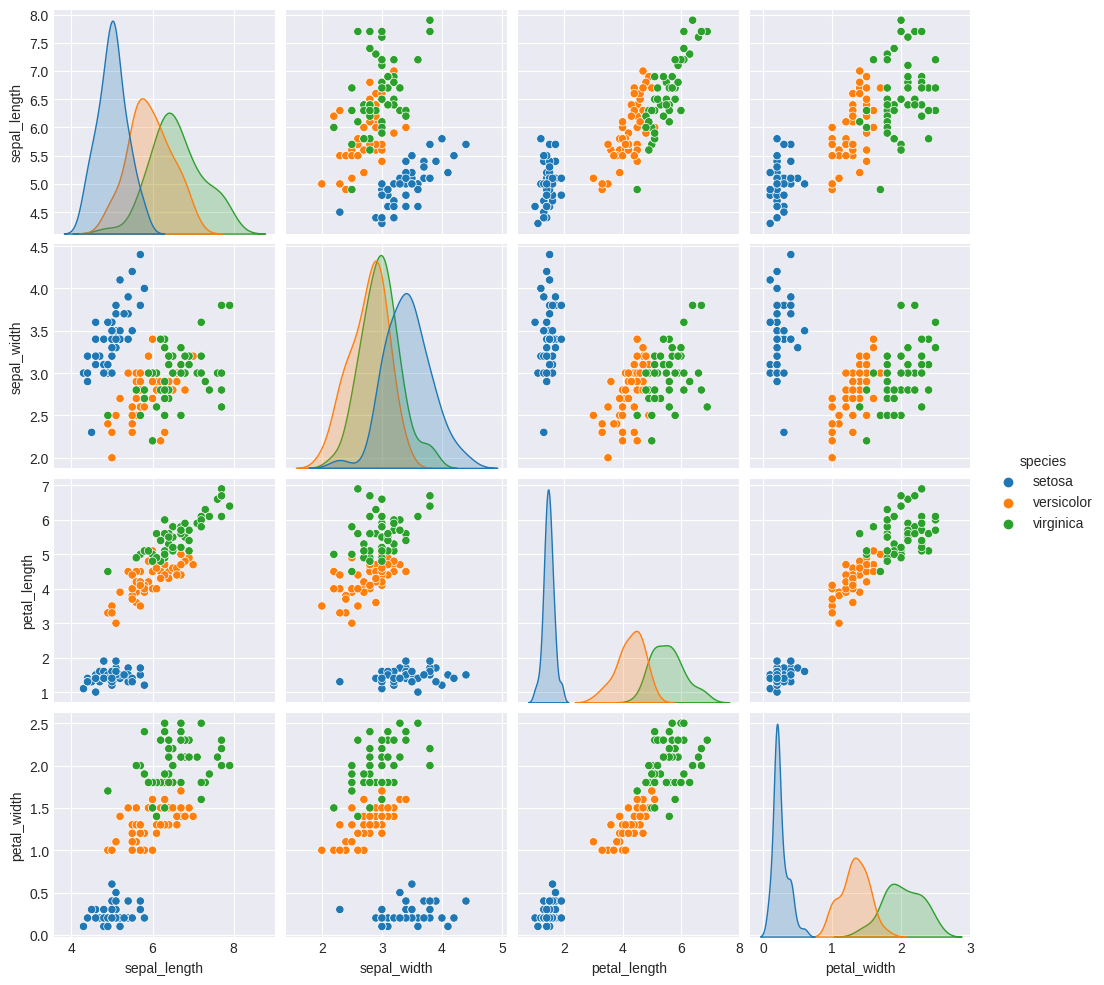

In [6]:
sns.pairplot(iris, hue="species");

Dividiendo los datos aleatoriamente en training y test:

In [7]:
X_train, X_test, y_train, y_test = train_test_split(iris.iloc[:,0:4],iris['species'],
                                                   test_size=0.25, random_state=123)

### KNN

El accuracy del test set es de 0.947


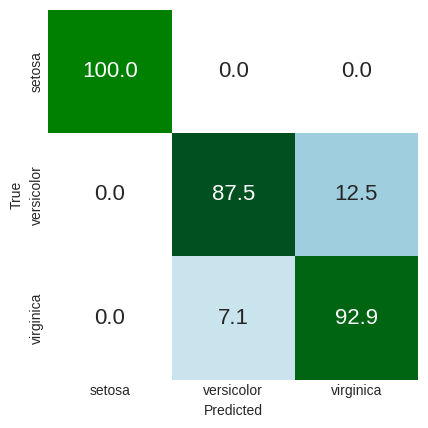

In [12]:
model = KNeighborsClassifier(n_neighbors=3).fit( X_train, y_train )
y_pred = model.predict(X_test)
print(f"El accuracy del test set es de {accuracy_score(y_test,y_pred):.3f}")
plotCM(y_test,y_pred, normalize=True)

### Naive Bayes

El accuracy del test set es de 0.947


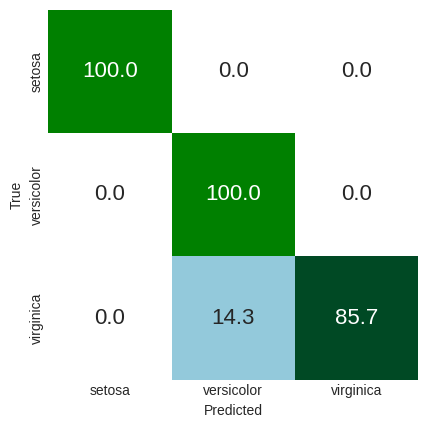

In [13]:
model = GaussianNB().fit( X_train, y_train )
y_pred = model.predict(X_test)
print(f"El accuracy del test set es de {accuracy_score(y_test,y_pred):.3f}")
plotCM(y_test,y_pred, normalize=True)

## Ejercicio
Con el dataset `RBC_Drepanocitos_Esferocitos.csv` realiza un proceso de análisis de los datos y crea al menos dos modelos usando KNN y Gaussian-NB. Compara los resultados y decide el modelo ganador